<a href="https://colab.research.google.com/github/Cykim0320/undergrad_ml_assignments/blob/main/02_assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression and classification are both types of supervised learning, but they predict different kinds of outcomes. In regression, the target variable is numeric, and the goal is to predict a continuous value, such as price or income. In classification, the target variable is categorical, and the goal is to assign an observation to one of several classes or labels. In short, regression predicts numbers, while classification predicts categories.

2. A confusion matrix is a table that compares the true labels with the predicted labels in a classification problem. Each row represents the actual class, and each column represents the predicted class. The diagonal shows correct predictions, while the off-diagonal entries show mistakes. A confusion matrix helps us see which classes are predicted well and which classes are being confused with others.

3. Accuracy is the proportion of correct predictions out of all predictions. It is calculated as the number of correct predictions divided by the total number of observations. However, accuracy can be misleading when the classes are imbalanced. For example, if one class is much more common than others, a model can achieve high accuracy by always predicting the majority class, even if it performs poorly on minority classes. Therefore, accuracy alone does not always fully describe model performance.

4. RMSE measures the average size of prediction errors in a regression model. It is calculated as the square root of the average of the squared differences between actual values and predicted values. RMSE shows how far, on average, the predictions are from the true values. Because the errors are squared before averaging, larger errors have a bigger impact on the RMSE.

5. Overfitting occurs when a model is too complex and fits the training data too closely, including noise. As a result, it performs well on the training data but poorly on new data. Underfitting occurs when a model is too simple and cannot capture the true patterns in the data, leading to poor performance on both training and test data. In k-NN, a very small k can lead to overfitting, while a very large k can lead to underfitting.

6. Splitting the data into training and testing sets allows us to evaluate the model on data it has not seen before. This helps us estimate how well the model will perform on new observations. If we choose k based only on training performance, we may select a model that overfits. By choosing k based on test accuracy or RMSE, we select a model that generalizes better and avoids overfitting.

7. A hard classification gives a single predicted label. It is simple and easy to interpret, but it does not show how confident the model is. A probability prediction gives the probability for each class, which provides more information about uncertainty and confidence. However, probability outputs can be harder to interpret and may require an additional rule to decide the final label. Hard predictions are useful for clear decisions, while probability predictions are useful when uncertainty matters.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [118]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()


In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

def minmax(x):
    return (x - min(x)) / (max(x) - min(x))

df = pd.read_csv("./data/land_mines.csv")
df.head()



,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [160]:
y = df['mine_type']

ctrl_list = ['voltage', 'height', 'soil']
x = df.loc[:, ctrl_list]

u = x.apply(minmax)




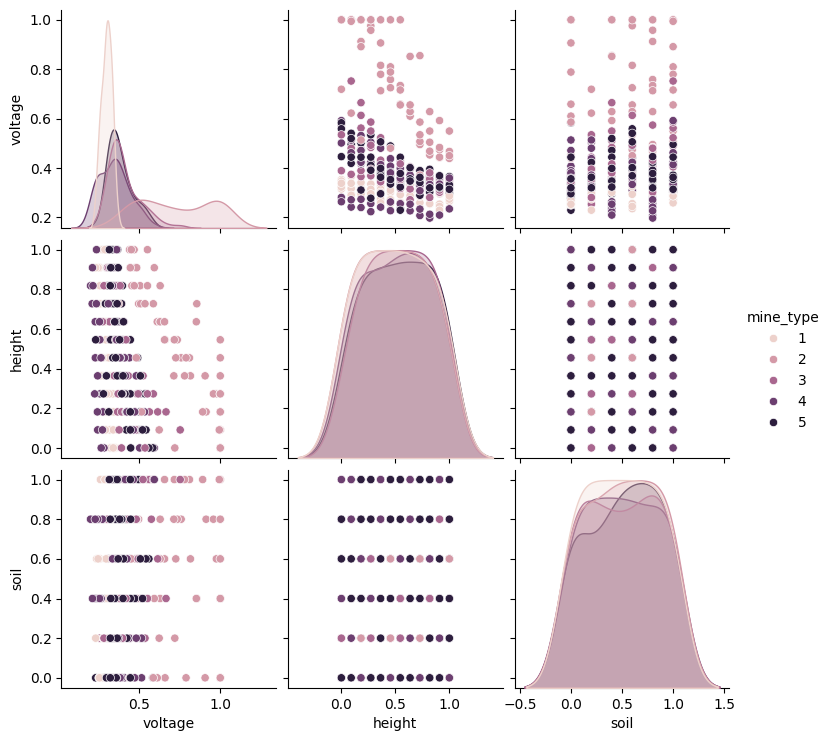

In [146]:
sns.pairplot(df, hue='mine_type')
plt.show()


In [161]:
u_train, u_test, y_train, y_test = train_test_split(
    u, y,
    test_size=0.5,
    random_state=100
)




In [162]:
k = 5

model = KNeighborsClassifier(n_neighbors=k)
model = model.fit(u_train, y_train)

y_hat = model.predict(u_test)




In [163]:
print(pd.crosstab(y_test, y_hat))

print("Accuracy:", model.score(u_test, y_test))



col_0       1   2   3  4   5
mine_type                   
1          25   0   8  2   3
2           0  22   9  0   4
3           5   0  10  7  11
4          11   2  13  6   3
5           8   1  11  5   3
Accuracy: 0.3905325443786982


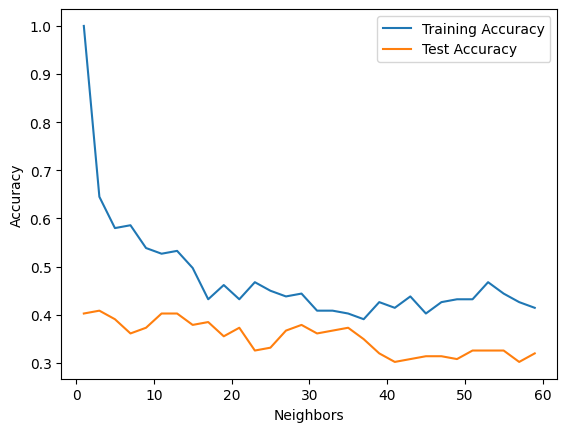

In [164]:
k_grid = [2*k+1 for k in range(30)]  # 1,3,5,...,59
test_accuracies = []
train_accuracies = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(u_train, y_train)

    test_acc = model.score(u_test, y_test)
    train_acc = model.score(u_train, y_train)

    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

sns.lineplot(x=k_grid, y=train_accuracies, label='Training Accuracy')
sns.lineplot(x=k_grid, y=test_accuracies, label='Test Accuracy')
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()


In [165]:
index_star = np.argmax(test_accuracies)
k_star = k_grid[index_star]

print("Optimal k:", k_star)
print("Best Test Accuracy:", test_accuracies[index_star])


Optimal k: 3
Best Test Accuracy: 0.40828402366863903


The features were scaled using min-max scaling because k-NN relies on distance, and variables must be on the same scale. The data was split evenly into 50% training and 50% test sets to ensure that all five mine types were represented in both sets. I tested different odd values of k and selected the value that maximized test accuracy. The optimal value was k = 3, with a test accuracy of about 41%. This accuracy is relatively low, which reflects the overlap between mine types seen in the pairplot. The confusion matrix shows that several classes are frequently misclassified, especially types 3, 4, and 5, which are often confused with other categories. Although some mine types have many correct predictions, there are still many off-diagonal errors, meaning the model struggles to clearly separate the groups. Small values of k gave higher training accuracy but risk overfitting, while larger values reduced both training and test accuracy, suggesting underfitting. Overall, the features voltage, height, and soil do not provide strong separation between classes, which limits predictive performance. In practice, this model should not be used as the sole decision-making tool, since misclassification could be dangerous. Instead, it could serve as a support system to provide an initial estimate, while final decisions should involve human experts and additional verification methods to ensure safety.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [166]:
# Preamble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def minmax(x):
    return (x - min(x)) / (max(x) - min(x))

# Load data
df = pd.read_csv('./data/USA_cars_datasets.csv')

# Keep only relevant variables
df = df[['price','year','mileage']]

print(df.head())
print("Shape:", df.shape)
print(df.isna().sum())




   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Shape: (2499, 3)
price      0
year       0
mileage    0
dtype: int64


In [167]:
df = df.dropna()


In [168]:
y = df['price']
ctrl_list = ['year','mileage']
x = df.loc[:, ctrl_list]

# Normalize features
u = x.apply(minmax)

# Train-test split (80/20)
u_train, u_test, y_train, y_test = train_test_split(
    u, y,
    test_size = .2,
    random_state = 100
)


In [169]:
k = 5

model = KNeighborsRegressor(n_neighbors = k)
model = model.fit(u_train, y_train)

y_hat = model.predict(u_test)


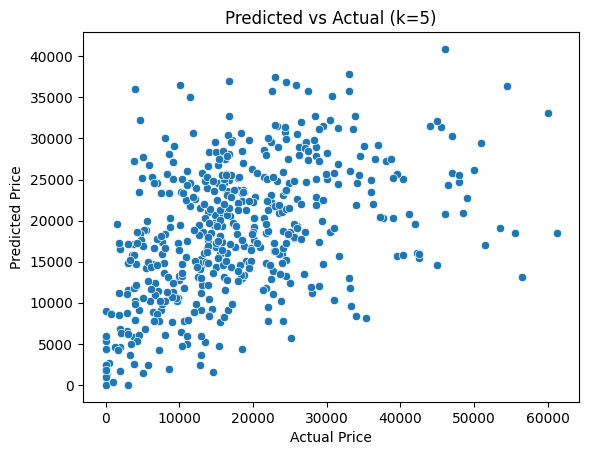

In [170]:
sns.scatterplot(x=y_test, y=y_hat)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual (k=5)")
plt.show()


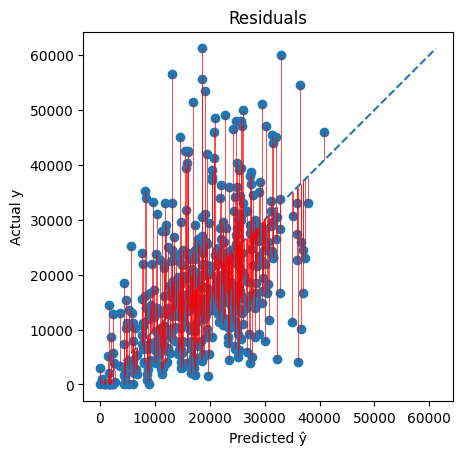

In [171]:
y_test_arr = np.asarray(y_test)
y_hat_arr = np.asarray(y_hat)

lo = min(y_test_arr.min(), y_hat_arr.min())
hi = max(y_test_arr.max(), y_hat_arr.max())

plt.plot([lo, hi], [lo, hi], linestyle='--')

plt.scatter(y_hat_arr, y_test_arr)

for a, b in zip(y_hat_arr, y_test_arr):
    plt.vlines(a, a, b, color='red', linewidth=.5)

plt.xlabel("Predicted ŷ")
plt.ylabel("Actual y")
plt.title("Residuals")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [172]:
def mse(y_true, y_pred):
    return np.sum((y_true - y_pred)**2) / len(y_true)

print("Test MSE:", mse(y_test, y_hat))


Test MSE: 116125529.16376


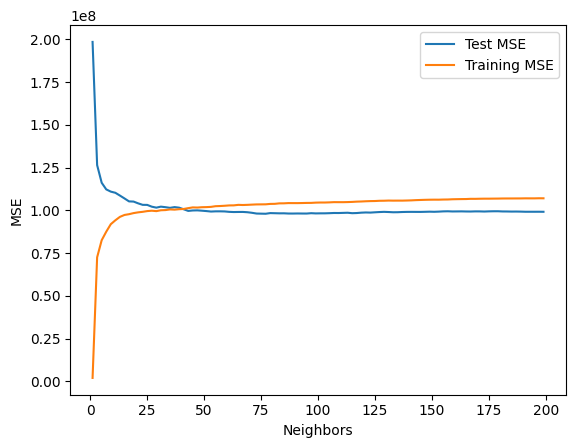

In [173]:
k_grid = [ (2*k+1) for k in range(100) ]  # 1~199
mses = []
mses_train = []

for k in k_grid:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(u_train, y_train)

    y_hat_test = model.predict(u_test)
    y_hat_train = model.predict(u_train)

    mses.append(mse(y_test, y_hat_test))
    mses_train.append(mse(y_train, y_hat_train))

sns.lineplot(x=k_grid, y=mses, label='Test MSE')
sns.lineplot(x=k_grid, y=mses_train, label='Training MSE')
plt.xlabel("Neighbors")
plt.ylabel("MSE")
plt.show()


In [174]:
index_star = np.argmin(mses)
k_star = k_grid[index_star]

print("Optimal k:", k_star)
print("Minimum Test MSE:", mses[index_star])


Optimal k: 77
Minimum Test MSE: 97988032.50151458


The scatter plot shows that many predicted prices are concentrated around the middle range of prices, rather than spreading evenly along the diagonal line. The predictions do not closely follow a perfect diagonal pattern, which means the model does not fully capture the relationship between year, mileage, and price.

When k is very small, the model becomes too sensitive to individual observations and produces more scattered predictions. This reflects overfitting, where the model learns noise from the training data.

As k increases, the predictions become smoother and closer to the overall average price. When k is very large, the model begins to ignore important differences in the data, which leads to underfitting.

The test MSE is minimized at k = 77, which suggests this value provides the best balance between overfitting and underfitting.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

def minmax(x):
    return (x - min(x)) / (max(x) - min(x))

# Load zoo data
df = pd.read_csv('./data/zoo.csv')

print(df.head())
print("Shape:", df.shape)



     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
2         1         0         0     1     0     1         0        0      4  
3         1         1         0     0     4     0         0        1      1  
4         1         1         0     0     4     1         0        1      1  
Shape: (101, 18)


In [177]:
for c in sorted(df['class'].unique()):
    print(f"\nClass {c}:")
    print(df[df['class']==c]['animal'].values)




Class 1:
['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']

Class 2:
['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'vulture' 'wren']

Class 3:
['pitviper' 'seasnake' 'slowworm' 'tortoise' 'tuatara']

Class 4:
['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse' 'sole' 'stingray' 'tuna']

Class 5:
['frog' 'frog' 'newt' 'toad']

Class 6:
['flea' 'gnat' 'honeybee' 'housefly' 'ladybird' 'moth' 'termite' 'wasp']

Class 7:
['clam' 'crab' 'crayfish' 'lobster' 'octopus' 'scorpion' 'seawasp' 'slug'
 'starfish' 'worm']


In [178]:
print("\nClass counts:")
print(df['class'].value_counts())



Class counts:
class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


In [179]:
print(df.describe())



             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [180]:
y = df['class']
X = df.drop(columns=['class','animal'])

u = X.apply(minmax)


In [181]:
u_train, u_test, y_train, y_test = train_test_split(
    u, y,
    test_size = .5,
    random_state = 100
)



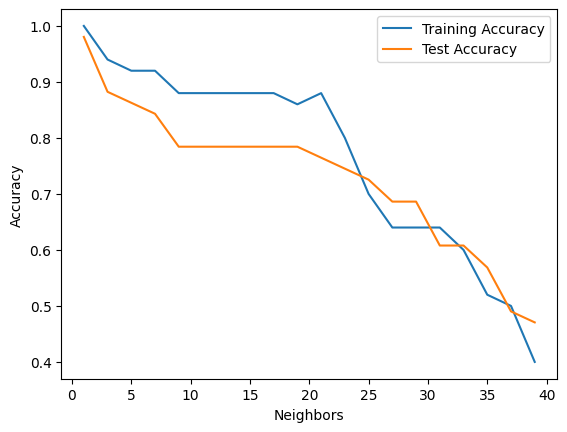

In [182]:
k_grid = [2*k+1 for k in range(20)]  # 1,3,5,...39
train_acc = []
test_acc = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(u_train, y_train)

    train_acc.append(model.score(u_train, y_train))
    test_acc.append(model.score(u_test, y_test))

sns.lineplot(x=k_grid, y=train_acc, label="Training Accuracy")
sns.lineplot(x=k_grid, y=test_acc, label="Test Accuracy")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()


In [184]:
index_star = np.argmax(test_acc)
k_star = k_grid[index_star]

print("Optimal k:", k_star)
print("Best Test Accuracy:", test_acc[index_star])


Optimal k: 1
Best Test Accuracy: 0.9803921568627451


In [185]:
model = KNeighborsClassifier(n_neighbors=k_star)
model.fit(u_train, y_train)

y_hat = model.predict(u_test)

print("\nConfusion Matrix:")
print(pd.crosstab(y_test, y_hat))

print("\nAccuracy:", accuracy_score(y_test, y_hat))



Confusion Matrix:
col_0   1   2  3  4  5  6  7
class                       
1      23   0  0  0  0  0  0
2       0  12  0  0  0  0  0
3       0   0  2  1  0  0  0
4       0   0  0  3  0  0  0
5       0   0  0  0  3  0  0
6       0   0  0  0  0  5  0
7       0   0  0  0  0  0  2

Accuracy: 0.9803921568627451


In [186]:
X_small = df[['milk','aquatic','airborne']]
u_small = X_small.apply(minmax)

u_train_s, u_test_s, y_train_s, y_test_s = train_test_split(
    u_small, y,
    test_size=.5,
    random_state=100
)

model_small = KNeighborsClassifier(n_neighbors=k_star)
model_small.fit(u_train_s, y_train_s)

y_hat_small = model_small.predict(u_test_s)

print("\nConfusion Matrix (Reduced Model):")
print(pd.crosstab(y_test_s, y_hat_small))

print("\nAccuracy (Reduced Model):", accuracy_score(y_test_s, y_hat_small))



Confusion Matrix (Reduced Model):
col_0   1  2  4  6
class             
1      23  0  0  0
2       0  4  0  8
3       0  2  1  0
4       0  0  3  0
5       0  0  3  0
6       0  1  0  4
7       0  0  2  0

Accuracy (Reduced Model): 0.6666666666666666


In [187]:
probs = model_small.predict_proba(u_test_s.values)

print("Classes represented:", model_small.classes_)
print("First few probability rows:")
print(probs[:5])


Classes represented: [1 2 3 4 5 6 7]
First few probability rows:
[[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The confusion matrix shows that almost all animals are classified correctly. Most values are on the diagonal, which means the predicted class matches the true class in most cases. The overall accuracy is about 0.98, which is very high.

This strong performance suggests that the full set of animal features clearly separates the seven classes. Many features such as milk, feathers, fins, and legs are highly informative. Because the animals in each class share similar characteristics, the nearest neighbor is usually from the same class.

The optimal value of k was 1. This means the model simply looks at the single closest animal in the training set. Since the classes are well separated, this works very well. However, k = 1 can sometimes lead to overfitting, because the model depends entirely on one observation.

When only milk, aquatic, and airborne are used, the accuracy drops to about 0.67. The confusion matrix shows that some classes are no longer predicted correctly. In fact, only a subset of the seven classes appear in the predictions.

This happens because three features are not enough to distinguish all animal groups. Many different classes share the same values for milk, aquatic, and airborne. For example, several non-mammals do not produce milk, and multiple groups may not be aquatic or airborne. As a result, the model cannot clearly separate all seven classes.

Since k = 1 was used, the predicted probabilities are mostly 0 or 1. This means the model is fully confident in its predictions. However, high confidence does not mean high accuracy. With limited features, the model makes more mistakes.

Overall, reducing the number of features removes important information and lowers the model’s ability to classify animals correctly.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)